# Homework 3
Erik Redmo Axelsson - 9705154137

# Chapter 11
## Disease Spreading
### Exercise 3: SIR Model with Temporal Immunity

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [59]:
def diffuse_spread_recover(x, y, status, d, beta, gamma, L, alpha):
    """
    Function performing the diffusion step, the infection step, and the 
    recovery step happening in one turn for a population of agents.
    
    Parameters
    ==========
    x, y : Agents' positions.
    status : Agents' status.
    d : Diffusion probability.
    beta : Infection probability.
    gamma : Recovery probability.
    L : Side of the square lattice.
    """
    
    N = np.size(x)
    
    # Diffusion step.
    diffuse = np.random.rand(N)
    move = np.random.randint(4, size=N)
    for i in range(N):
        if diffuse[i] < d:
            if move[i] == 0:
                x[i] = x[i] - 1
            elif move[i] == 1:
                y[i] = y[i] - 1
            elif move[i] == 2:
                x[i] = x[i] + 1
            else: 
                # move[i] == 3
                y[i] = y[i] + 1
                
    # Enforce pbc.
    x = x % L
    y = y % L

    # Spreading disease step.
    infected = np.where(status == 1)[0]
    
    for i in infected:
        # Check whether other particles share the same position.
        same_x = np.where(x == x[i])
        same_y = np.where(y == y[i])
        same_cell = np.intersect1d(same_x, same_y)
        for j in same_cell:
            if status[j] == 0:
                if np.random.rand() < beta:
                    status[j] = 1
    # Susceptible again
    for i in np.where(status == 2): 
        if np.random.rand() < alpha:
            status[i] = 0
        
    # Recover step.
    for i in infected:
        # Check whether the infected recovers.
        if np.random.rand() < gamma:
            status[i] = 2


    
    return x, y, status

In [61]:
N_part = 1000  # Total agent population.
d = 0.95  # Diffusion probability.
beta = 0.05 # Infection spreading probability.
gamma = 0.001  # Recovery probability.
L = 200  # Side of the lattice.
#repetitions = 3  # Average over repetitions different runs.

I0 = 30  # Initial number of infected agents.

alpha = 0.05 # Prob that recovered agents become susceptible again

In [62]:
S_list = []
I_list = []
R_list = []

for i in range(5):
    # Initialize agents position.
    x = np.random.randint(L, size=N_part)
    y = np.random.randint(L, size=N_part)

    # Initialize agents status.
    status = np.zeros(N_part)
    status[0:I0] = 1

    step = 0

    S = []  # Keeps track of the susceptible agents.
    I = []  # Keeps track of the infectious agents.
    R = []  # Keeps track of the recovered agents.
    S.append(N_part - I0)
    I.append(I0)
    R.append(0)

    running = True  # Flag to control the loop.

    while running:

        x, y, status = diffuse_spread_recover(x, y, status, d, beta, gamma, L, alpha)  
        
        S.append(np.size(np.where(status == 0)[0]))
        I.append(np.size(np.where(status == 1)[0]))
        R.append(np.size(np.where(status == 2)[0]))
        
        step += 1
        if I[-1] == 0 or step > 100000: 
            running = False
        
    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
            
    print('Done.')

Done.
Done.
Done.
Done.
Done.


# P1

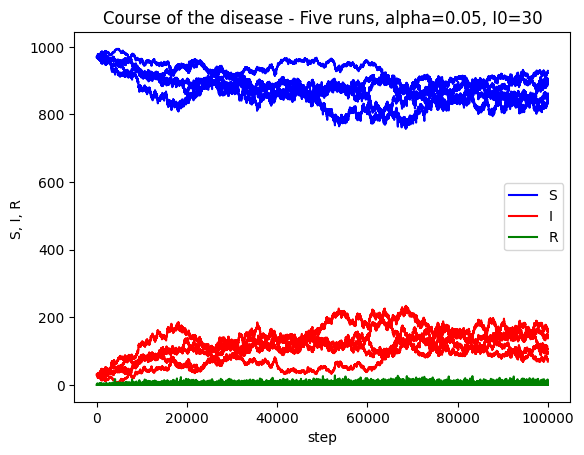

In [63]:
for i, S in enumerate(S_list):
    t = np.array(np.arange(len(S)))
    S_agents = np.array(S) 
    I_agents = np.array(I_list[i]) 
    R_agents = np.array(R_list[i]) 

    if i == 0:
        plt.plot(t, S_agents, 'b-', label='S')
        plt.plot(t, I_agents, 'r-', label='I')
        plt.plot(t, R_agents, 'g-', label='R')
    else:
        plt.plot(t, S_agents, 'b-')
        plt.plot(t, I_agents, 'r-')
        plt.plot(t, R_agents, 'g-')

plt.legend()
plt.title('Course of the disease - Five runs, alpha=0.05, I0=30')
plt.xlabel('step')
plt.ylabel('S, I, R ')
plt.show()

In [69]:
print(f'S average: {np.mean(np.array(S_list))}')
print(f'I average: {np.mean(np.array(I_list))}')
print(f'R average: {np.mean(np.array(R_list))}')
for i in S_list:
    print(f'# Simulations: {len(i)}')

S average: 887.5253194936101
I average: 110.27954440911182
R average: 2.1951360972780543
# Simulations: 100002
# Simulations: 100002
# Simulations: 100002
# Simulations: 100002
# Simulations: 100002


# Q1

We can see that both the number of susceptible, and infected doesn't really increase that much over time. This does however mean that the disease would linger and not die out, posing threats to the population even though it may not strike out the entire population. 

In [70]:
N_part = 1000  # Total agent population.
d = 0.95  # Diffusion probability.
beta = 0.05 # Infection spreading probability.
gamma = 0.001  # Recovery probability.
L = 200  # Side of the lattice.
#repetitions = 3  # Average over repetitions different runs.

I0 = 10  # Initial number of infected agents.

alpha = 0.005 # Prob that recovered agents become susceptible again

In [71]:
S_list = []
I_list = []
R_list = []

for i in range(5):
    # Initialize agents position.
    x = np.random.randint(L, size=N_part)
    y = np.random.randint(L, size=N_part)

    # Initialize agents status.
    status = np.zeros(N_part)
    status[0:I0] = 1

    step = 0

    S = []  # Keeps track of the susceptible agents.
    I = []  # Keeps track of the infectious agents.
    R = []  # Keeps track of the recovered agents.
    S.append(N_part - I0)
    I.append(I0)
    R.append(0)

    running = True  # Flag to control the loop.

    while running:

        x, y, status = diffuse_spread_recover(x, y, status, d, beta, gamma, L, alpha)  
        
        S.append(np.size(np.where(status == 0)[0]))
        I.append(np.size(np.where(status == 1)[0]))
        R.append(np.size(np.where(status == 2)[0]))
        
        step += 1
        if I[-1] == 0 or step > 100000: 
            running = False
        
    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
            
    print('Done.')

Done.
Done.
Done.
Done.
Done.


# P2

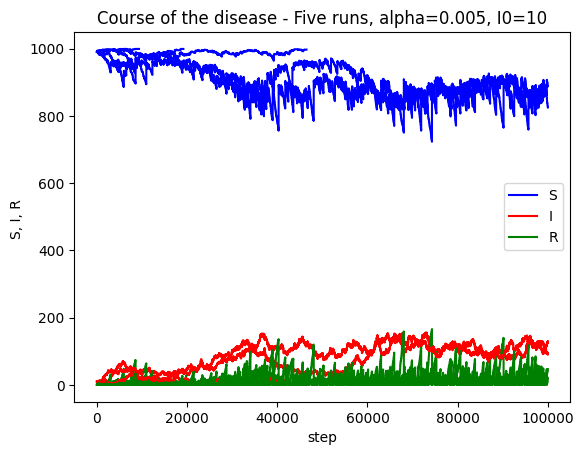

In [72]:
for i, S in enumerate(S_list):
    t = np.array(np.arange(len(S)))
    S_agents = np.array(S) 
    I_agents = np.array(I_list[i]) 
    R_agents = np.array(R_list[i]) 

    if i == 0:
        plt.plot(t, S_agents, 'b-', label='S')
        plt.plot(t, I_agents, 'r-', label='I')
        plt.plot(t, R_agents, 'g-', label='R')
    else:
        plt.plot(t, S_agents, 'b-')
        plt.plot(t, I_agents, 'r-')
        plt.plot(t, R_agents, 'g-')

plt.legend()
plt.title('Course of the disease - Five runs, alpha=0.005, I0=10')
plt.xlabel('step')
plt.ylabel('S, I, R ')
plt.show()

In [76]:
#print(f'S average: {np.mean(np.array(S_list))}')
#print(f'I average: {np.mean(np.array(I_list))}')
#print(f'R average: {np.mean(np.array(R_list))}')
for i, S in enumerate(S_list):
    print(f'S average: {np.mean(np.array(S))}')
    print(f'I average: {np.mean(np.array(I_list[i]))}')
    print(f'R average: {np.mean(np.array(R_list[i]))}')
    print(f'# Simulations: {len(S)}')

S average: 988.0472687431522
I average: 9.441540147127876
R average: 2.511191109719831
# Simulations: 19167
S average: 996.9033226152197
I average: 2.8090032154340836
R average: 0.28767416934619505
# Simulations: 9330
S average: 905.1981760364793
I average: 77.917491650167
R average: 16.884332313353735
# Simulations: 100002
S average: 979.2971059709521
I average: 17.218310919849383
R average: 3.484583109198494
# Simulations: 46475
S average: 895.190156196876
I average: 86.07428851422972
R average: 18.735555288894222
# Simulations: 100002


# Q2
For these parameters, i.e with a lower alpha (risk of becoming susceptible again), but with also less infected at the start of the simulation, our two plots don't look too different from each other. With that said, as long as there is some risk of becoming susceptible again, the number of infected people will never reach zero, and the disease will affect the population over time. Below is the same run as above but with alpha=0.

Done.
Done.
Done.
Done.
Done.


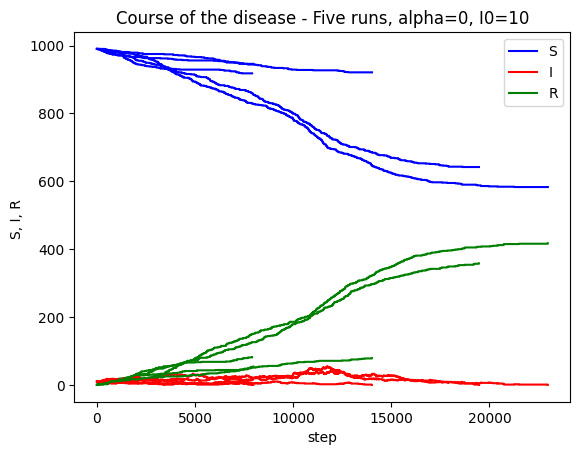

In [50]:
N_part = 1000  # Total agent population.
d = 0.95  # Diffusion probability.
beta = 0.05 # Infection spreading probability.
gamma = 0.001  # Recovery probability.
L = 200  # Side of the lattice.
#repetitions = 3  # Average over repetitions different runs.

I0 = 10  # Initial number of infected agents.

alpha = 0 # Prob that recovered agents become susceptible again

S_list = []
I_list = []
R_list = []

for i in range(5):
    # Initialize agents position.
    x = np.random.randint(L, size=N_part)
    y = np.random.randint(L, size=N_part)

    # Initialize agents status.
    status = np.zeros(N_part)
    status[0:I0] = 1

    step = 0

    S = []  # Keeps track of the susceptible agents.
    I = []  # Keeps track of the infectious agents.
    R = []  # Keeps track of the recovered agents.
    S.append(N_part - I0)
    I.append(I0)
    R.append(0)

    running = True  # Flag to control the loop.

    while running:

        x, y, status = diffuse_spread_recover(x, y, status, d, beta, gamma, L, alpha)  
        
        S.append(np.size(np.where(status == 0)[0]))
        I.append(np.size(np.where(status == 1)[0]))
        R.append(np.size(np.where(status == 2)[0]))
        
        step += 1
        if I[-1] == 0 or step > 100000: 
            running = False
        
    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
            
    print('Done.')

for i, S in enumerate(S_list):
    t = np.array(np.arange(len(S)))
    S_agents = np.array(S) 
    I_agents = np.array(I_list[i]) 
    R_agents = np.array(R_list[i]) 

    if i == 0:
        plt.plot(t, S_agents, 'b-', label='S')
        plt.plot(t, I_agents, 'r-', label='I')
        plt.plot(t, R_agents, 'g-', label='R')
    else:
        plt.plot(t, S_agents, 'b-')
        plt.plot(t, I_agents, 'r-')
        plt.plot(t, R_agents, 'g-')

plt.legend()
plt.title('Course of the disease - Five runs, alpha=0, I0=10')
plt.xlabel('step')
plt.ylabel('S, I, R ')
plt.show()

In this situation we can see that it is fairly common for the disease to die out sooner than before the 100.000 iterations. This situation mimics the situation where people who've become infected afterwards become immune to the disease, limiting the spread.

# Chapter 12
## Network Models
### Average Path Lengths and Clustering Coefficients of Graphs

In [77]:
def erdos_renyi_rg(n, p):
    """
    Function generating an Erdős-Rényi random graph
    
    Parameters
    ==========
    n : Number of nodes.
    p : Probability that each possible edge is present.
    """
    
    A = np.zeros([n, n])    
    rn = np.random.rand(n, n)
    A[np.where(rn < p)] = 1
    
    for i in range(n):
        A[i, i] = 0
        
    # This below is for plotting in a circular arrangement.
    x = np.cos(np.arange(n) / n * 2 * np.pi)
    y = np.sin(np.arange(n) / n * 2 * np.pi) 
    
    return A, x, y

In [80]:
def nodes_degree(A):
    """
    Function returning the degree of a node.
    
    Parameters
    ==========
    A : Adjacency matrix (assumed symmetric).
    """
    
    degree = np.sum(A, axis=0)
    
    return degree

def path_length(A, i, j):
    """
    Function returning the minimum path length between thwo nodes.
    
    Parameters
    ==========
    A : Adjacency matrix (assumed symmetric).
    i, j : Nodes indices.
    """
    
    Lij = - 1
    
    if A[i, j] > 0:
        Lij = 1
    else:
        N = np.size(A[0, :])
        P = np.zeros([N, N]) + A
        n = 1
        running = True
        while running:
            P = np.matmul(P, A)
            n += 1
            running
            if P[i, j] > 0:
                Lij = n           
            if (n > N) or (Lij > 0):
                running = False   
    
    return Lij


def matrix_path_length(A):
    """
    Function returning a matrix L of minimum path length between nodes.
    
    Parameters
    ==========
    A : Adjacency matrix (assumed symmetric).
    """
    
    N = np.size(A[0, :])
    L = np.zeros([N, N]) - 1 
    
    for i in range(N):
        for j in range(i + 1, N):
            L[i, j] = path_length(A, i, j)
            L[j, i] = L[i, j]
    
    return L


def clustering_coefficient(A):
    """
    Function returning the clustering coefficient of a graph.
    
    Parameters
    ==========
    A : Adjacency matrix (assumed symmetric).
    """
            
    K = nodes_degree(A)
    N = np.size(K)

    C_n = np.sum(np.diagonal(np.linalg.matrix_power(A, 3)))
    C_d = np.sum(K * (K - 1))
    
    C = C_n / C_d
    
    return C

In [ ]:
n = 100
p = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

L_big = []
L_avg_big = []
C_big = []

for prob in p:
    L_list = []
    L_avg_list = []
    C_list = []
    for i in range(3):
        A_ER, x_ER, y_ER = erdos_renyi_rg(n, prob)
        L = matrix_path_length(A_ER)
        # The path length is the average of the off-diagonal elements of L, so I'm taking average(L - diag(L))
        L_avg = np.average(L - np.diag(np.diag(L)))
        L_avg_list.append(L_avg)
        clust_coeff = clustering_coefficient(A_ER)
        C_list.append(clust_coeff)

    L_avg_big.append(L_avg_list)
    C_big.append(C_list)

"\nprint('Path length matrix')\nprint(L)\n\nplt.figure(figsize=(8, 8))\n\nfor i in range(n):\n    for j in range(i + 1, n):\n        if A_ER[i, j] > 0:\n            plt.plot([x_ER[i], x_ER[j]], [y_ER[i], y_ER[j]], '-', \n                     color='k')\nplt.plot(x_ER, y_ER, '.', markersize=12)\nplt.legend()\nplt.title('Erdős-Rényi random graph')\nplt.axis('equal')\nplt.show()\n\n"

In [ ]:
# I need low, high, mid for L_avg_big
low = []
mid = []
high = []
for row in L_avg_big:
    low.append(min(row))
    high.append(max(row))
    row.remove(min(row))
    row.remove(max(row))
    mid.append((row[0]))


#print(np.array(L_avg_big).shape)



In [87]:
print(low)
print(mid)
print(high)

[2.397, 3.7178, 3.1898, 2.8644, 2.6166, 2.4986, 2.3608, 2.2892, 2.207, 1.791, 1.5768, 1.4832, 1.3866, 1.2862, 1.1872, 1.0846, 0.99]
[2.714, 3.7238, 3.208, 3.0884, 2.6812, 2.5342, 2.4226, 2.29, 2.2146, 1.7936, 1.5812, 1.4848, 1.387, 1.2906, 1.188, 1.0938, 0.99]
[3.0612, 3.8426, 3.382, 3.1372, 2.7156, 2.5632, 2.43, 2.3508, 2.2876, 1.8006, 1.5818, 1.501, 1.3872, 1.2934, 1.194, 1.0938, 0.99]


# P1

Text(0.5, 0, 'p')

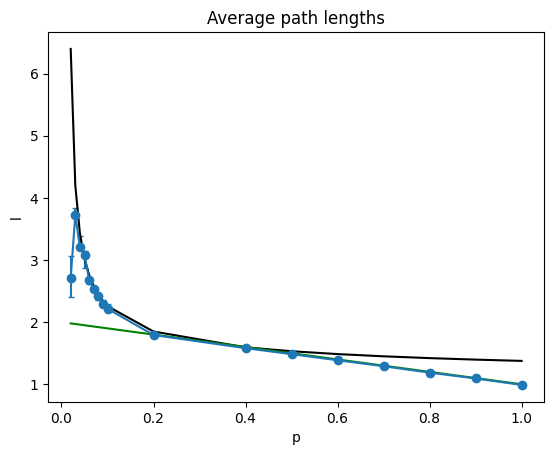

In [ ]:
low_err = np.array(mid) - np.array(low)
high_err = np.array(high) - np.array(mid)
error = [low_err, high_err]


p_arr = np.array(p)

gamma = 0.57722
L_av0 = (np.log(n)-gamma) / (np.log(p_arr*(n-1))) + 1/2
L_av1 = 2 - p_arr

fig = plt.figure()
plt.errorbar(p_arr, mid, yerr=error, fmt='-o', capsize=2)
plt.plot(p, L_av0, 'k-')
plt.plot(p, L_av1, 'g-')
plt.title('Average path lengths')
plt.ylabel('l')
plt.xlabel('p')

We can see that the plot follows L_av0 for when p is close to zero and 2-p when p is close to 1.

In [106]:
low_c = []
mid_c = []
high_c = []
for row in C_big:
    low_c.append(min(row))
    high_c.append(max(row))
    row.remove(min(row))
    row.remove(max(row))
    mid_c.append((row[0]))

# P2

Text(0.5, 0, 'p')

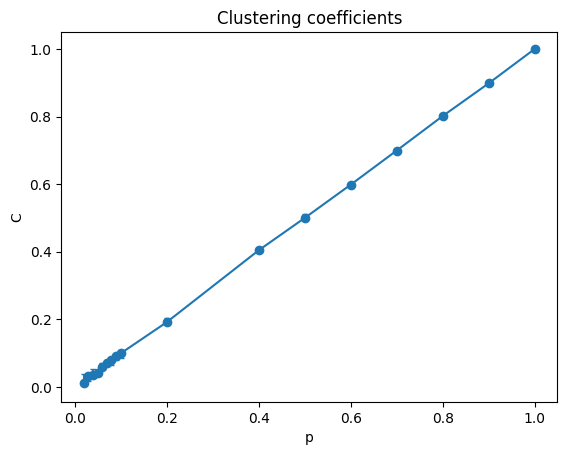

In [107]:
low_err_c = np.array(mid_c) - np.array(low_c)
high_err_c = np.array(high_c) - np.array(mid_c)
error_c = [low_err_c, high_err_c]

fig = plt.figure()
plt.errorbar(p_arr, mid_c, yerr=error_c, fmt='-o', capsize=2)
plt.title('Clustering coefficients')
plt.ylabel('C')
plt.xlabel('p')

In [108]:
n = 200
p = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

L_big = []
L_avg_big = []
C_big = []

for prob in p:
    L_list = []
    L_avg_list = []
    C_list = []
    for i in range(3):
        A_ER, x_ER, y_ER = erdos_renyi_rg(n, prob)
        L = matrix_path_length(A_ER)
        # The path length is the average of the off-diagonal elements of L, so I'm taking average(L - diag(L))
        L_avg = np.average(L - np.diag(np.diag(L)))
        L_avg_list.append(L_avg)
        clust_coeff = clustering_coefficient(A_ER)
        C_list.append(clust_coeff)

    L_avg_big.append(L_avg_list)
    C_big.append(C_list)

In [109]:
# I need low, high, mid for L_avg_big
low = []
mid = []
high = []
for row in L_avg_big:
    low.append(min(row))
    high.append(max(row))
    row.remove(min(row))
    row.remove(max(row))
    mid.append((row[0]))

Text(0.5, 0, 'p')

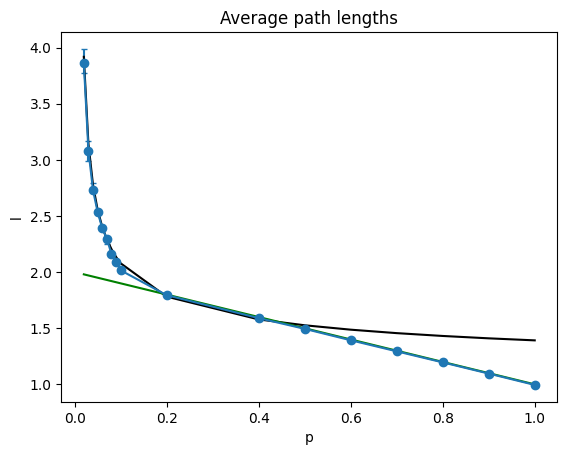

In [110]:
low_err = np.array(mid) - np.array(low)
high_err = np.array(high) - np.array(mid)
error = [low_err, high_err]


p_arr = np.array(p)

gamma = 0.57722
L_av0 = (np.log(n)-gamma) / (np.log(p_arr*(n-1))) + 1/2
L_av1 = 2 - p_arr

fig = plt.figure()
plt.errorbar(p_arr, mid, yerr=error, fmt='-o', capsize=2)
plt.plot(p, L_av0, 'k-')
plt.plot(p, L_av1, 'g-')
plt.title('Average path lengths')
plt.ylabel('l')
plt.xlabel('p')

In [111]:
low_c = []
mid_c = []
high_c = []
for row in C_big:
    low_c.append(min(row))
    high_c.append(max(row))
    row.remove(min(row))
    row.remove(max(row))
    mid_c.append((row[0]))

Text(0.5, 0, 'p')

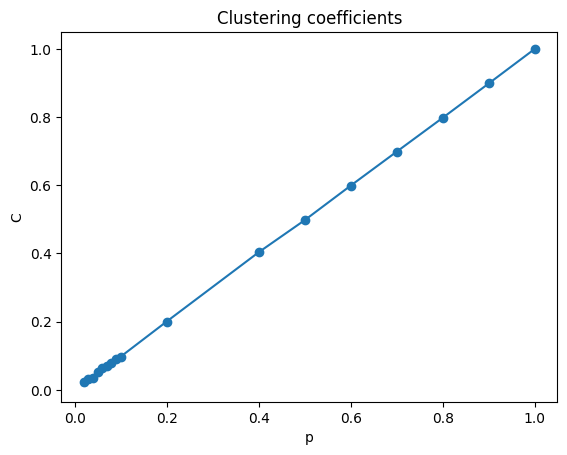

In [112]:
low_err_c = np.array(mid_c) - np.array(low_c)
high_err_c = np.array(high_c) - np.array(mid_c)
error_c = [low_err_c, high_err_c]

fig = plt.figure()
plt.errorbar(p_arr, mid_c, yerr=error_c, fmt='-o', capsize=2)
plt.title('Clustering coefficients')
plt.ylabel('C')
plt.xlabel('p')